In [4]:
import numpy as np
import scipy as sp
from scipy.signal import blackman
from scipy.fft import rfft, rfftfreq

import cospar
from everest import window
%matplotlib inline

In [57]:
from scipy.signal import blackman
from scipy.fft import rfft, rfftfreq

def time_smooth(x, *ys, sampleFactor = 1, kind = 'linear'):
    yield (ix := np.linspace(np.min(x), np.max(x), round(len(x) * sampleFactor)))
    for y in ys:
        yield sp.interpolate.interp1d(x, y, kind = kind)(ix)

def time_fourier(x, *ys, sampleFactor = 1, interpKind = 'linear'):
    x, *ys = time_smooth(x, *ys, sampleFactor = sampleFactor, kind = interpKind)
    N = len(x)
    T = np.diff(x).mean()
    yield rfftfreq(N, T)[: N // 2]
    w = blackman(N)
    for y in ys:
        yield np.abs(rfft(y * w))[: N // 2]


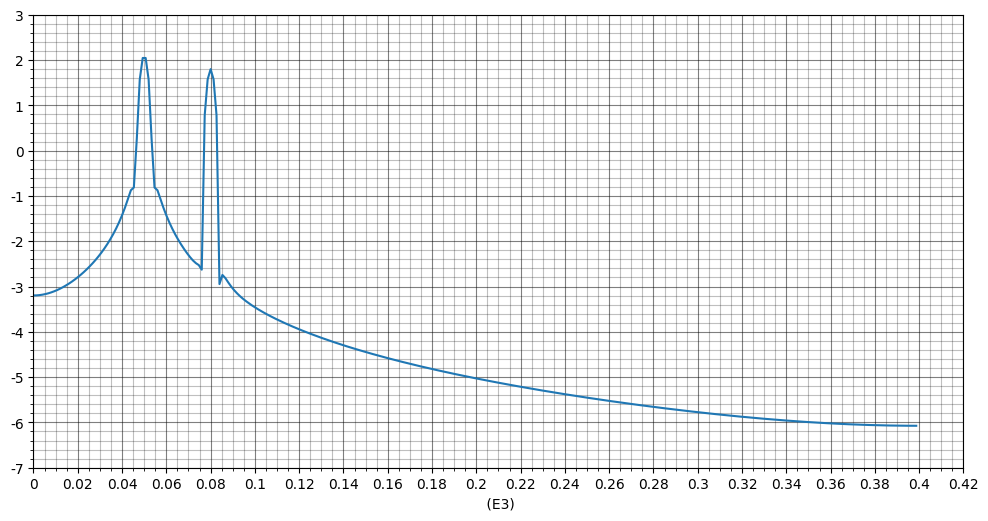

In [67]:
N = 600
T = 1.0 / 800.0

# x = np.sort(np.random.rand(N)) * N * T
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

xf, yf = time_fourier(x, y, sampleFactor = 1)
window.plot.line(xf, np.log10(yf), size = (12, 6))

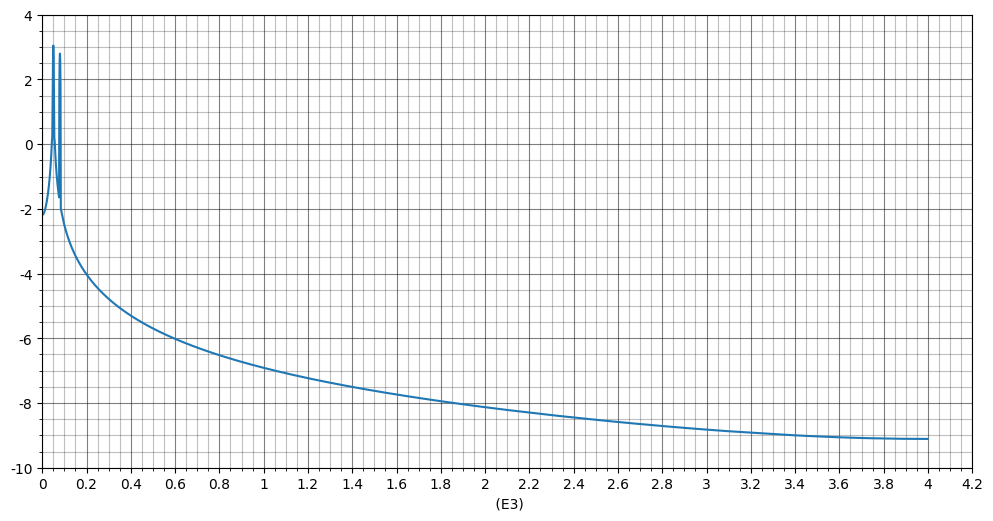

In [72]:
N = 6000
T = 1.0 / 8000.0

# x = np.sort(np.random.rand(N)) * N * T
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

xf, yf = time_fourier(x, y, sampleFactor = 1)
window.plot.line(xf, np.log10(yf), size = (12, 6))

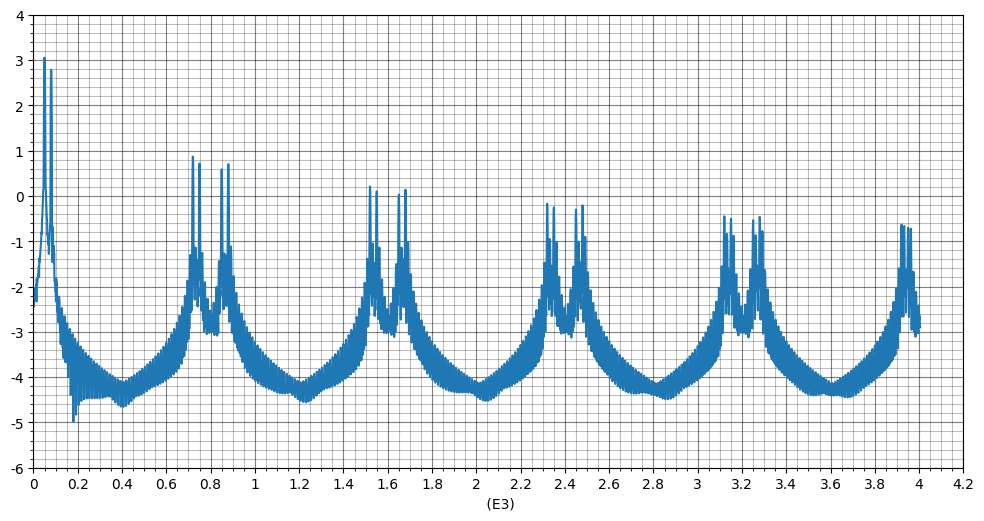

In [29]:
xf, yf = time_fourier(x, y, sampleFactor = 10)
window.plot.line(xf, np.log10(yf), size = (12, 6))

In [ ]:
import numpy as np
import scipy as sp
from scipy.signal import blackman
from scipy.fft import rfft, rfftfreq

def time_smooth(x, *ys, sampleFactor = 1, kind = 'linear'):
    yield (ix := np.linspace(np.min(x), np.max(x), round(len(x) * sampleFactor)))
    for y in ys:
        yield sp.interpolate.interp1d(x, y, kind = kind)(ix)

def time_fourier(x, *ys):
    x, *ys = time_smooth(x, *ys)
    N = len(x)
    T = np.ptp(x) / N
    yield rfftfreq(N, T)[: N // 2]
    w = blackman(N)
    for y in ys:
        yield np.abs(rfft(y * w))[: N // 2]

In [ ]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

In [ ]:
xf, yf = time_fourier(x, y)

In [ ]:
import cospar
from everest import window
%matplotlib inline
window.plot.line(xf, np.log10(yf))

In [ ]:
import os
os.getcwd()